<h2>DATA 620 - Week 7 - Network Reduction Island Method</h2>

<h3>Mohamed Thasleem, Kalikul Zaman</h3>
<h3>Jeyaraman, Ramalingam</h3>

<h3>Introduction</h3>
 
As per OReily Chapter 4 Methods We have identified a dataset which has three components. The Data source is the list of Athletes who interact among themeselves. The data has interactions of Athletes from three countries. We will consider the component with high degree and reduce the component into multiple subgraphs to find out threshold.



In [5]:
#import libraries
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

<h3>Defining Functions for Island reduction method</h3>

In [6]:
#function to trim edges
def trim_edges(g, weight=1):
        g2=nx.Graph()
        for f, to, edata in g.edges(data=True):
                if edata['weight'] > weight:
                        g2.add_edge(f,to,weight=int(edata['weight']))
        return g2

In [7]:
#function for island method
def island_method(g, iterations=20):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    #print(weights)
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

<h3>Data Source</h3>

In [8]:
data=pd.read_csv("athletes_edges.csv", error_bad_lines=False)

In [9]:
data1 = data[(data.node_1 == 0)]
data1

,node_1,node_2,weight
0,0,15000,56
1,0,5911,64
2,0,13203,62
3,0,13704,70
4,0,11031,61
5,0,2095,57
6,0,10340,68
7,0,2801,54
8,0,970,66
9,0,5983,57


Name: 
Type: Graph
Number of nodes: 14847
Number of edges: 89731
Average degree:  12.0874


C:\Users\aisha\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


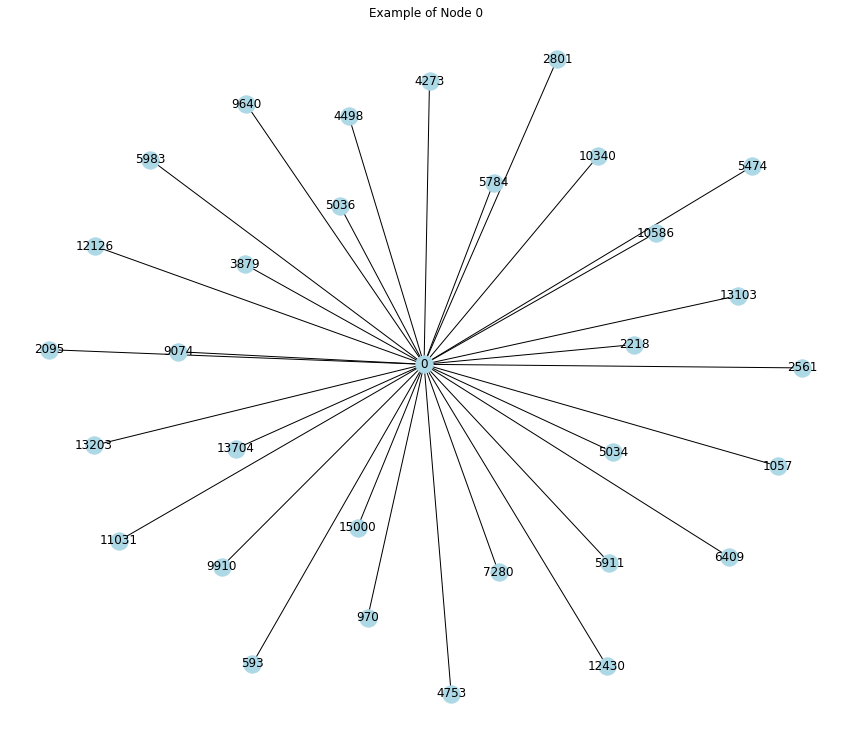

In [10]:
G = nx.from_pandas_edgelist(data,'node_1','node_2',edge_attr='weight')
G1 = nx.from_pandas_edgelist(data1,'node_1','node_2',edge_attr='weight')
print(nx.info(G))
plt.figure(figsize = (15,13))
plt.title("Example of Node 0")
nx.draw_networkx(G1, node_color='lightblue')
plt.axis('off')
plt.show(1)

<h3>Calculate the Length of each sub component</h3>

In [11]:
[len(c) for c in nx.connected_component_subgraphs(G)]

[14836, 11]

<h3>Get the Highest degree component</h3>

In [12]:
graphs = list(nx.connected_component_subgraphs(G))[0]
print(nx.info(graphs))

Name: 
Type: Graph
Number of nodes: 14836
Number of edges: 89665
Average degree:  12.0875


In [18]:
cf = pd.DataFrame()
cf['eig_centrality'] = nx.eigenvector_centrality(graphs).values()
cf['deg_centrality'] = nx.degree_centrality(graphs).values()
cf.index = list(graphs)
cf.sort_values(by=['deg_centrality'], ascending=False)
cf.head()

,eig_centrality,deg_centrality
0,0.006260,0.002090
15000,0.000302,0.040984
5911,0.005989,0.005190
13203,0.003246,0.001955
13704,0.001512,0.000404


<h3>Call Island Method to get threshold values</h3>

In [22]:
islands = []
islands=island_method(graphs)

<h3>Display the Threshold value</h3> 

In [23]:
for i in islands:
    print(i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1]))[0]))

50 14763 14746
51 14699 14676
52 14613 14584
53 14519 14484
54 14404 14359
55 14276 14218
56 14160 13182
57 13984 13022
58 13805 12856
59 13584 12635
60 13295 12361
61 12988 12061
62 12640 11719
63 12196 11261
64 11690 10777
65 11053 10073
66 10250 9170
67 9136 7846
68 7587 5709
69 5076 2319


<h3>Insights</h3>

Based on the above output, we can have 69 as the threshold value for the weight as more than 50% of nodes are preserved. It looks like the ideal threshold value.